In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully")

Libraries loaded successfully


In [5]:
# Load the salary survey data
df = pd.read_csv('data/Salary_Survey.csv')

# Show basic information
print("Dataset loaded!")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

Dataset loaded!
Number of rows: 28178
Number of columns: 23


In [6]:
# Look at the first few rows
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for missing data
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Timestamp                                                                                                                                                                                                                                  93
How old are you?                                                                                                                                                                                                                           93
What industry do you work in?                                                                                                                                                                                                             167
Job title                                                                                                                                                                                                                                  94
If your job title

In [9]:
# Basic statistics for numerical columns
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
       How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.  \
count                                       2.078000e+04                                                                                                                                                
mean                                        1.815342e+04                                                                                                                                                
std                                         8.337722e+05                                                                                                                                                
min                                         0.000000e+00                                                                                                                          

In [10]:
# Check data types
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Timestamp                                                                                                                                                                                                                                object
How old are you?                                                                                                                                                                                                                         object
What industry do you work in?                                                                                                                                                                                                            object
Job title                                                                                                                                                                                                                                object
If your job t

In [12]:
# Get column names to find salary column
print("All columns:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col[:50]}...")  # Print first 50 characters

All columns:
0: Timestamp...
1: How old are you?...
2: What industry do you work in?...
3: Job title...
4: If your job title needs additional context, please...
5: What is your annual salary? (You'll indicate the c...
6: How much additional monetary compensation do you g...
7: Please indicate the currency...
8: If "Other," please indicate the currency here: ...
9: If your income needs additional context, please pr...
10: What country do you work in?...
11: If you're in the U.S., what state do you work in?...
12: What city do you work in?...
13: How many years of professional work experience do ...
14: How many years of professional work experience do ...
15: What is your highest level of education completed?...
16: What is your gender?...
17: Unnamed: 17...
18: Unnamed: 18...
19: Unnamed: 19...
20: Unnamed: 20...
21: Unnamed: 21...
22: Unnamed: 22...


In [13]:
# Analyze the salary column (column 5)
print("Salary column - first 10 values:")
print(df.iloc[:, 5].head(10))
print("\nSalary data type:", df.iloc[:, 5].dtype)

Salary column - first 10 values:
0     55,000
1     54,600
2     34,000
3     62,000
4     60,000
5     62,000
6     33,000
7     50,000
8    112,000
9     45,000
Name: What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.), dtype: object

Salary data type: object


In [14]:
# Convert salary to numeric (remove commas)
df['salary_clean'] = df.iloc[:, 5].astype(str).str.replace(',', '')
df['salary_clean'] = pd.to_numeric(df['salary_clean'], errors='coerce')

print("Salary converted to numeric!")
print("\nBasic salary statistics:")
print(df['salary_clean'].describe())

Salary converted to numeric!

Basic salary statistics:
count    2.808500e+04
mean     3.612420e+05
std      3.620792e+07
min      0.000000e+00
25%      5.400000e+04
50%      7.500000e+04
75%      1.100000e+05
max      6.000070e+09
Name: salary_clean, dtype: float64


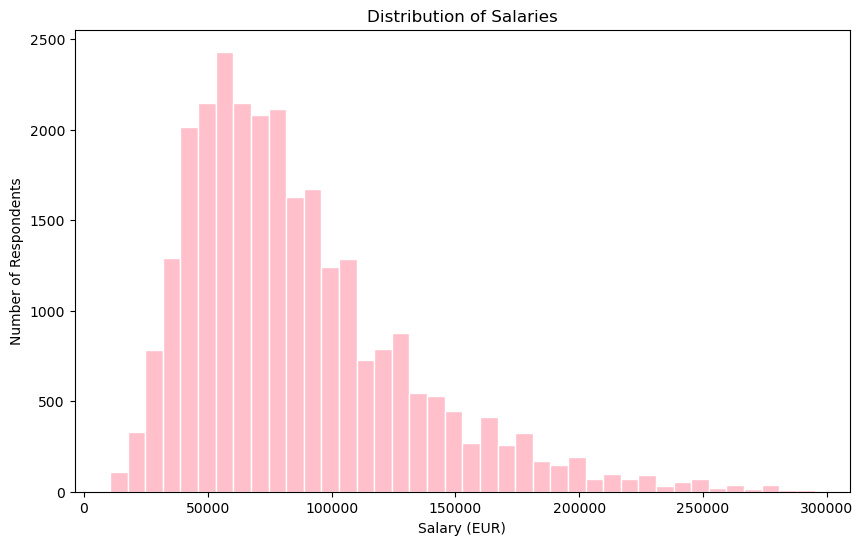

Median salary: EUR 75000
Average salary: EUR 85867


In [32]:
# Create a histogram of salaries (filtering outliers)
salary_filtered = df['salary_clean'][(df['salary_clean'] > 10000) & (df['salary_clean'] < 300000)]

plt.figure(figsize=(10, 6))
plt.hist(salary_filtered, bins=40, edgecolor='white', color='pink')
plt.title('Distribution of Salaries')
plt.xlabel('Salary (EUR)')
plt.ylabel('Number of Respondents')

plt.show()

print("Median salary: EUR", int(salary_filtered.median()))
print("Average salary: EUR", int(salary_filtered.mean()))

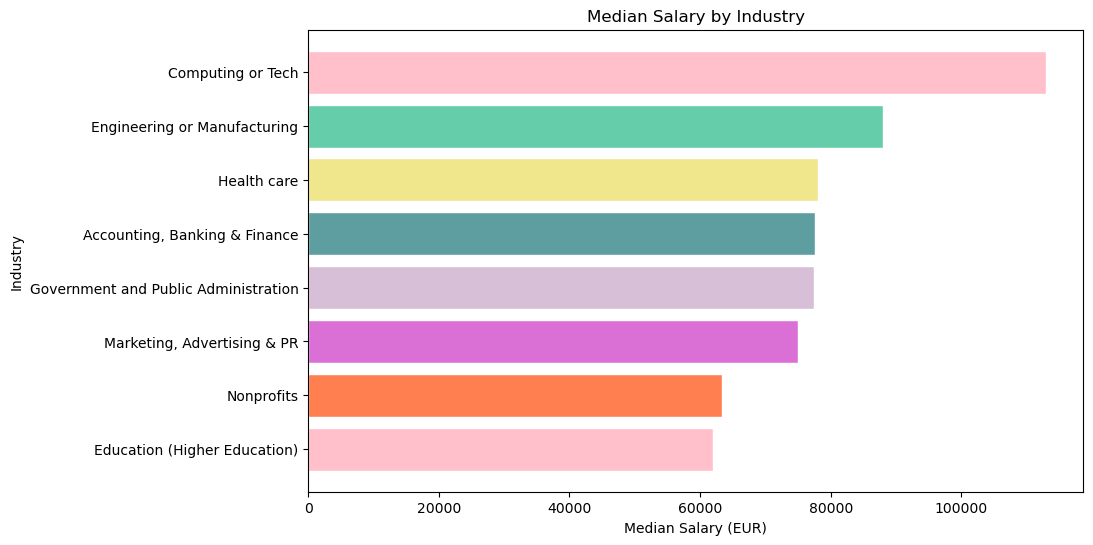

In [63]:
# Average salary by top industries
industry_col = df.columns[2]
top_industries = df[industry_col].value_counts().head(8).index
industry_data = df[df[industry_col].isin(top_industries)]

industry_salaries = industry_data.groupby(industry_col)['salary_clean'].median().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(industry_salaries.index, industry_salaries.values, color=['pink', 'coral', 'orchid', 'thistle', 'cadetblue', 'khaki', 'mediumaquamarine'], edgecolor='white')
plt.title('Median Salary by Industry')
plt.xlabel('Median Salary (EUR)')
plt.ylabel('Industry')

plt.show()

In [27]:
# Check education levels
edu_col = df.columns[15]
print("Education levels:")
print(df[edu_col].value_counts())

Education levels:
What is your highest level of education completed?
College degree                        13529
Master's degree                        8871
Some college                           2072
PhD                                    1427
Professional degree (MD, JD, etc.)     1325
High School                             639
Name: count, dtype: int64


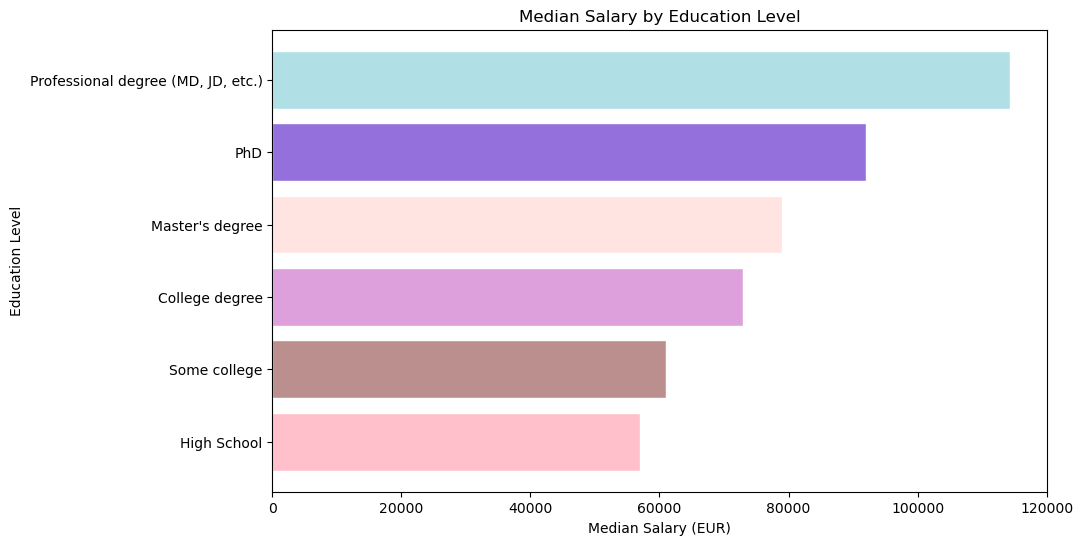

In [61]:
# Salary by education level
edu_salaries = df.groupby(edu_col)['salary_clean'].median().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(edu_salaries.index, edu_salaries.values, color=['pink', 'rosybrown', 'plum', 'mistyrose', 'mediumpurple', 'powderblue'], edgecolor='white')
plt.title('Median Salary by Education Level')
plt.xlabel('Median Salary (EUR)')
plt.ylabel('Education Level')

plt.show()

In [31]:
# Data cleaning summary
print("DATA CLEANING SUMMARY")
print("=" * 50)
print("Original rows:", len(df))
print("Rows with valid salary:", df['salary_clean'].notna().sum())
print("Rows with missing salary:", df['salary_clean'].isna().sum())
print("\nMissing values by column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

DATA CLEANING SUMMARY
Original rows: 28178
Rows with valid salary: 28085
Rows with missing salary: 93

Missing values by column:
Timestamp                                                                                                                                                                                                                                  93
How old are you?                                                                                                                                                                                                                           93
What industry do you work in?                                                                                                                                                                                                             167
Job title                                                                                                                                                    

In [35]:
# Gender distribution
gender_col = df.columns[16]
print("Gender distribution:")
print(df[gender_col].value_counts())

Gender distribution:
What is your gender?
Woman                            21376
Man                               5493
Non-binary                         746
Other or prefer not to answer      298
Prefer not to answer                 1
Name: count, dtype: int64


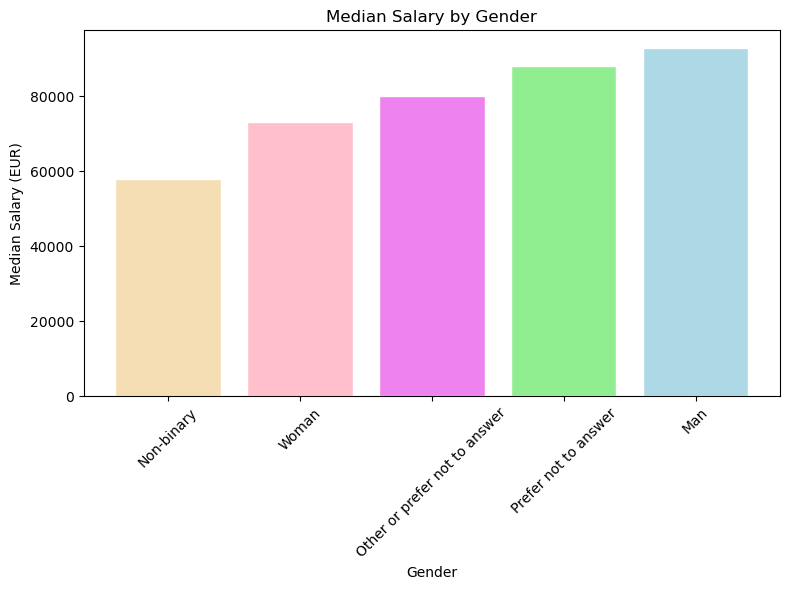

In [54]:
# Salary by gender
gender_salary = df.groupby(gender_col)['salary_clean'].median().sort_values()

plt.figure(figsize=(8, 6))
plt.bar(gender_salary.index, gender_salary.values, color=['wheat', 'pink', 'violet' , 'lightgreen' , 'lightblue'], edgecolor='white')
plt.title('Median Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Median Salary (EUR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()